# To build a model for training and testing:

In [10]:
import os
import numpy as np # linear algebra
import matplotlib.pyplot as plt

In [11]:
# Dl framwork - tensorflow, keras a backend 
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization 
from tensorflow.keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from IPython.display import display
from os import listdir
from os.path import isfile, join
from PIL import Image
import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
dir_name_train_EOSINOPHIL = 'dataset/Train/EOSINOPHIL'
dir_name_train_LYMPHOCYTE = 'dataset/Train/LYMPHOCYTE'
dir_name_train_MONOCYTE = 'dataset/Train/MONOCYTE'

In [28]:
def plot_images(item_dir, n=6):
    all_item_dir = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dir][:n]
    
    plt.figure(figsize=(80, 40))
    for idx, img_path in enumerate(item_files):
        plt.subplot(7, n, idx+1)
        img = plt.imread(img_path)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    
    plt.tight_layout()

In [29]:
def Images_details_Print_data(data, path):
    print(" ====== Images in: ", path)    
    for k, v in data.items():
        print("%s:\t%s" % (k, v))

def Images_details(path):
    files = [f for f in glob.glob(path + "**/*.*", recursive=True)]
    data = {}
    data['images_count'] = len(files)
    data['min_width'] = 10**100  # No image will be bigger than that
    data['max_width'] = 0
    data['min_height'] = 10**100  # No image will be bigger than that
    data['max_height'] = 0


    for f in files:
        im = Image.open(f)
        width, height = im.size
        data['min_width'] = min(width, data['min_width'])
        data['max_width'] = max(width, data['max_height'])
        data['min_height'] = min(height, data['min_height'])
        data['max_height'] = max(height, data['max_height'])

    Images_details_Print_data(data, path)


Trainned data for EOSINOPHIL:

 ====== Images in:  dataset/Train/EOSINOPHIL
images_count:	500
min_width:	320
max_width:	320
min_height:	240
max_height:	240



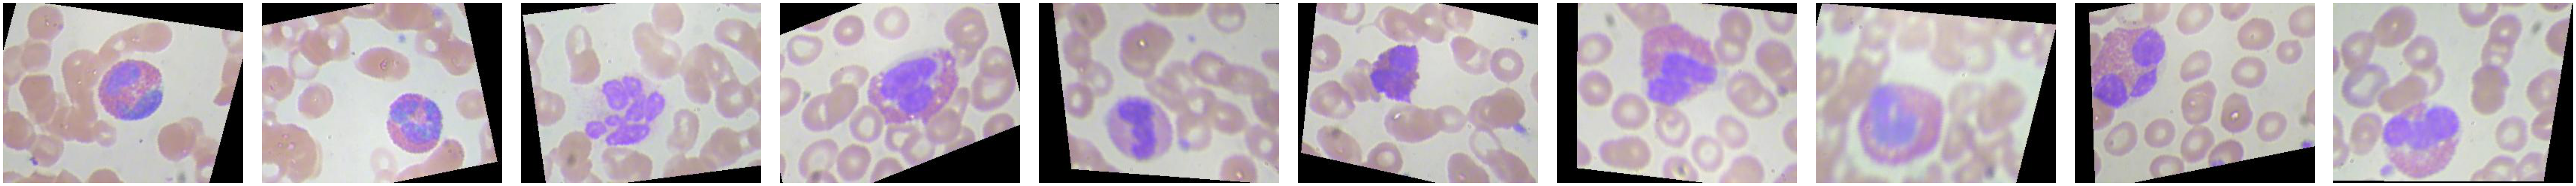

In [30]:
print("")
print("Trainned data for EOSINOPHIL:")
print("")
Images_details(dir_name_train_EOSINOPHIL)
print("")
plot_images(dir_name_train_EOSINOPHIL,10)


Trainned data for LYMPHOCYTE:

 ====== Images in:  dataset/Train/LYMPHOCYTE
images_count:	500
min_width:	320
max_width:	320
min_height:	240
max_height:	240



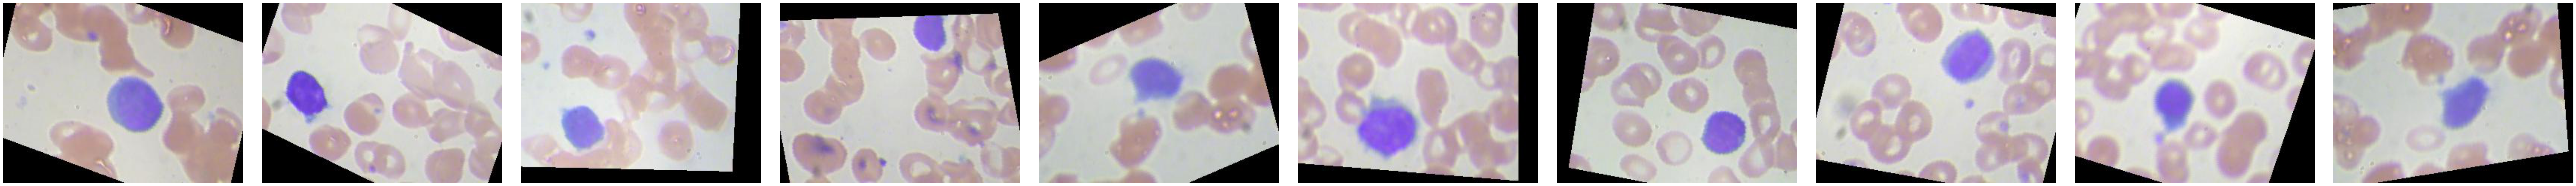

In [17]:
print("")
print("Trainned data for LYMPHOCYTE:")
print("")
Images_details(dir_name_train_LYMPHOCYTE)
print("")
plot_images(dir_name_train_LYMPHOCYTE, 10)


Trainned data for MONOCYTE:

 ====== Images in:  dataset/Train/MONOCYTE
images_count:	500
min_width:	320
max_width:	320
min_height:	240
max_height:	240



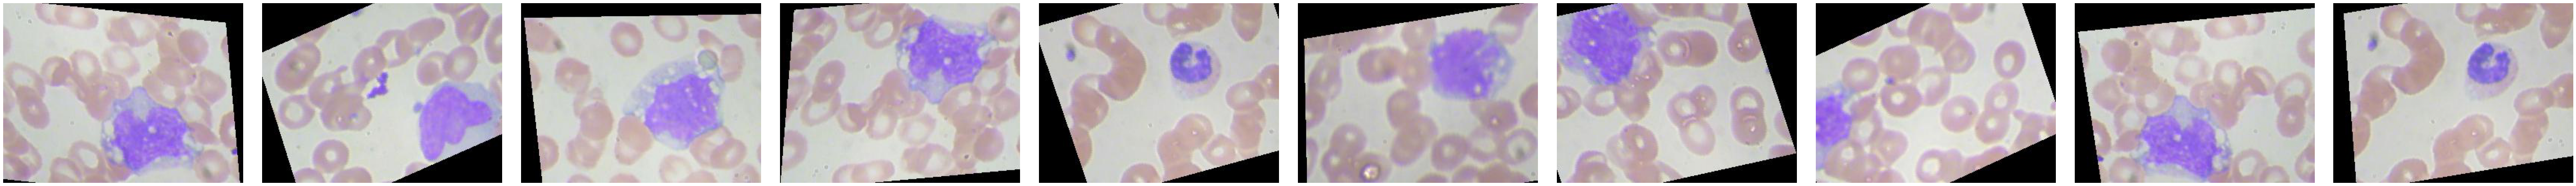

In [18]:
print("")
print("Trainned data for MONOCYTE:")
print("")
Images_details(dir_name_train_MONOCYTE)
print("")
plot_images(dir_name_train_MONOCYTE, 10)

In [31]:
Classifier=Sequential()
Classifier.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Flatten())
Classifier.add(Dense(38, activation='relu'))

In [32]:
Classifier.add(Dense(4, activation='softmax'))
Classifier.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [22]:
training_set=train_datagen.flow_from_directory('dataset/Train',target_size=(128,128),batch_size=32,class_mode='categorical')
test_set=test_datagen.flow_from_directory('dataset/Test',target_size=(128,128),batch_size=32,class_mode='categorical')

Found 2000 images belonging to 4 classes.
Found 376 images belonging to 4 classes.


In [23]:
epochs = 10
batch_size = 32

In [24]:
#### Fitting the model
history = Classifier.fit(
           training_set, steps_per_epoch=training_set.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_set,validation_steps=test_set.samples // batch_size)

Epoch 1/10
62/62 [==============================] - 33s 523ms/step - loss: 4.8831 - accuracy: 0.2637 - val_loss: 1.3563 - val_accuracy: 0.3381
Epoch 2/10
62/62 [==============================] - 26s 423ms/step - loss: 1.3679 - accuracy: 0.3079 - val_loss: 1.3643 - val_accuracy: 0.3011
Epoch 3/10
62/62 [==============================] - 23s 370ms/step - loss: 1.3464 - accuracy: 0.3410 - val_loss: 1.2928 - val_accuracy: 0.4091
Epoch 4/10
62/62 [==============================] - 24s 394ms/step - loss: 1.3337 - accuracy: 0.3684 - val_loss: 1.3785 - val_accuracy: 0.3352
Epoch 5/10
62/62 [==============================] - 23s 374ms/step - loss: 1.2973 - accuracy: 0.3928 - val_loss: 1.2309 - val_accuracy: 0.4375
Epoch 6/10
62/62 [==============================] - 23s 376ms/step - loss: 1.2764 - accuracy: 0.3979 - val_loss: 1.4752 - val_accuracy: 0.3210
Epoch 7/10
62/62 [==============================] - 24s 390ms/step - loss: 1.2613 - accuracy: 0.4309 - val_loss: 1.1698 - val_accuracy: 0.4574

In [26]:
def graph():
    #Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

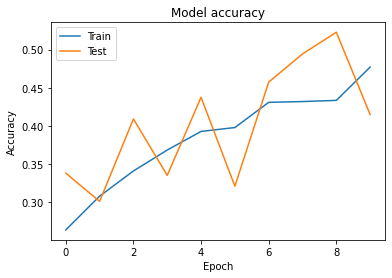

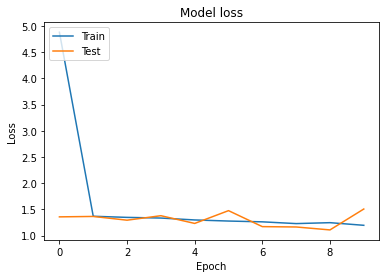

In [27]:
graph()